# True Parameters (0.2, 3)

## Variance

100%|██████████| 100/100 [00:05<00:00, 19.02it/s]


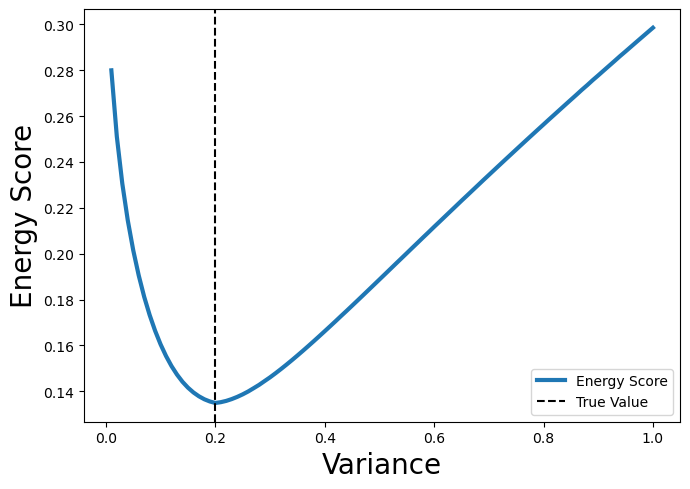

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
from tqdm import tqdm
import torch.nn as nn

def Energy_Score(energy_beta, observations_y, simulations_Y):
    m = len(simulations_Y)
    diff_Y_y = torch.pow(
        torch.norm(
            (observations_y.unsqueeze(1) -
             simulations_Y.unsqueeze(0)).float(),
            dim=2, keepdim=True).reshape(-1, 1),
        energy_beta)
    diff_Y_Y = 2 * torch.pow(
        nn.functional.pdist(simulations_Y),
        energy_beta)
    Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
    return Energy

def SR_eval(energy_beta, real_samples, fake_samples):
    out = 0
    for i in range(len(real_samples)):
        out += Energy_Score(energy_beta, real_samples[i].view(-1, 1), fake_samples[i].view(-1, 1))
    return out / (len(real_samples) + len(fake_samples)) 

def pairwise_distance(x1, x2):
    return ((x1.unsqueeze(1) - x2.unsqueeze(0)) ** 2).sum(-1)

def RBF(variance, length_scale):
    def rbf_kernel(x1, x2):
        dist = pairwise_distance(x1, x2)
        covariance_matrix = variance*torch.exp(-0.5 * dist / length_scale ** 2)
        try:
            L = torch.cholesky(covariance_matrix, upper=False)
        except RuntimeError:
            min_eig = torch.min(torch.linalg.eigvalsh(covariance_matrix))
            covariance_matrix += torch.eye(covariance_matrix.shape[0]) * (-min_eig + 1e-6)
        return covariance_matrix
    return rbf_kernel

locs = torch.meshgrid(torch.tensor([0,1,2,3,4]), torch.tensor([0,1,2,3,4]))
locs = torch.stack((locs[0].flatten(), locs[1].flatten())).t().float()

length_scale = 3
variance = 0.2
rbf_kernel = RBF(variance, length_scale)
true_cov = rbf_kernel(locs, locs)

torch.manual_seed(42)
mvn = MultivariateNormal(torch.zeros(25), covariance_matrix=true_cov.float())
obs_z = mvn.sample((100,))

SR_beta = 1.0
SR_E = []
mean = torch.zeros(25)
for i in tqdm(torch.linspace(0.01, 1, 100)):
    torch.manual_seed(42)
    cov_ = RBF(i, length_scale)(locs, locs)
    multi = MultivariateNormal(mean, covariance_matrix=cov_.float())
    sims = multi.sample((100,))
    SR_E.append(SR_eval(SR_beta, obs_z, sims))

plt.figure(figsize=(7, 5))
plt.plot(torch.linspace(0.01, 1, 100), SR_E , label='Energy Score', linewidth=3)

plt.axvline(x=0.2, color='black', linestyle='--', label='True Value')
plt.legend()

plt.xlabel('Variance', fontsize=20)
plt.ylabel('Energy Score', fontsize=20)

plt.tight_layout()
plt.show()


## Length Scale

100%|██████████| 100/100 [00:06<00:00, 16.17it/s]


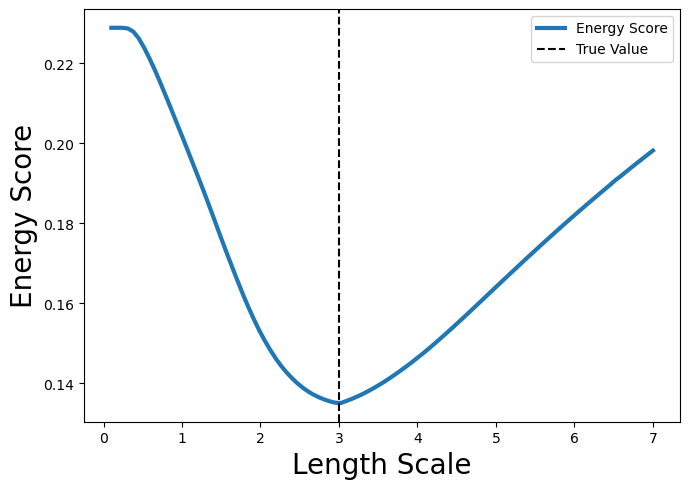

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
from tqdm import tqdm
import torch.nn as nn

def Energy_Score(energy_beta, observations_y, simulations_Y):
    m = len(simulations_Y)
    diff_Y_y = torch.pow(
        torch.norm(
            (observations_y.unsqueeze(1) -
             simulations_Y.unsqueeze(0)).float(),
            dim=2, keepdim=True).reshape(-1, 1),
        energy_beta)
    diff_Y_Y = 2 * torch.pow(
        nn.functional.pdist(simulations_Y),
        energy_beta)
    Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
    return Energy

def SR_eval(energy_beta, real_samples, fake_samples):
    out = 0
    for i in range(len(real_samples)):
        out += Energy_Score(energy_beta, real_samples[i].view(-1, 1), fake_samples[i].view(-1, 1))
    return out / (len(real_samples) + len(fake_samples)) 

def pairwise_distance(x1, x2):
    return ((x1.unsqueeze(1) - x2.unsqueeze(0)) ** 2).sum(-1)

def RBF(variance, length_scale):
    def rbf_kernel(x1, x2):
        dist = pairwise_distance(x1, x2)
        covariance_matrix = variance*torch.exp(-0.5 * dist / length_scale ** 2)
        try:
            L = torch.cholesky(covariance_matrix, upper=False)
        except RuntimeError:
            min_eig = torch.min(torch.linalg.eigvalsh(covariance_matrix))
            covariance_matrix += torch.eye(covariance_matrix.shape[0]) * (-min_eig + 1e-6)
        return covariance_matrix
    return rbf_kernel

locs = torch.meshgrid(torch.tensor([0,1,2,3,4]), torch.tensor([0,1,2,3,4]))
locs = torch.stack((locs[0].flatten(), locs[1].flatten())).t().float()

length_scale = 3
variance = 0.2
rbf_kernel = RBF(variance, length_scale)
true_cov = rbf_kernel(locs, locs)

torch.manual_seed(42)
mvn = MultivariateNormal(torch.zeros(25), covariance_matrix=true_cov.float())
obs_z = mvn.sample((100,))

SR_beta = 1.0
SR_E = []
mean = torch.zeros(25)
for i in tqdm(torch.linspace(0.1, 7, 100)):
    torch.manual_seed(42)
    cov_ = RBF(variance, i)(locs, locs)
    multi = MultivariateNormal(mean, covariance_matrix=cov_.float())
    sims = multi.sample((100,))
    SR_E.append(SR_eval(SR_beta, obs_z, sims))

plt.figure(figsize=(7, 5))
plt.plot(torch.linspace(0.1, 7, 100), SR_E , label='Energy Score', linewidth=3)

plt.axvline(x=3, color='black', linestyle='--', label='True Value')
plt.legend()

plt.xlabel('Length Scale', fontsize=20)
plt.ylabel('Energy Score', fontsize=20)

plt.tight_layout()
plt.show()


## Bivariate Contour Plot

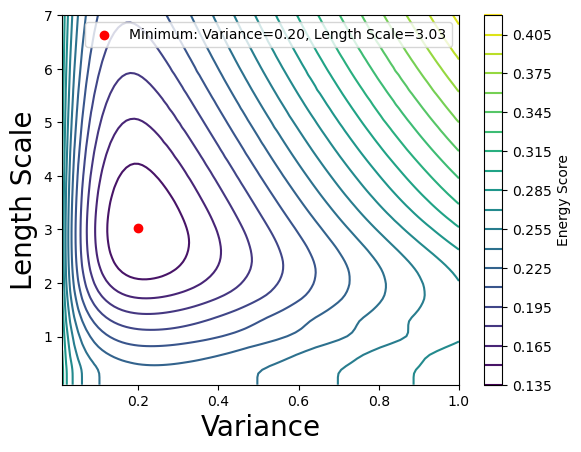

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
import torch.nn as nn

def Energy_Score(energy_beta, observations_y, simulations_Y):
    m = len(simulations_Y)
    diff_Y_y = torch.pow(
        torch.norm(
            (observations_y.unsqueeze(1) -
             simulations_Y.unsqueeze(0)).float(),
            dim=2, keepdim=True).reshape(-1, 1),
        energy_beta)
    diff_Y_Y = 2 * torch.pow(
        nn.functional.pdist(simulations_Y),
        energy_beta)
    Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
    return Energy

def SR_eval(energy_beta, real_samples, fake_samples):
    out = 0
    for i in range(len(real_samples)):
        out += Energy_Score(energy_beta, real_samples[i].view(-1, 1), fake_samples[i].view(-1, 1))
    return out / (len(real_samples) + len(fake_samples)) 

def pairwise_distance(x1, x2):
    return ((x1.unsqueeze(1) - x2.unsqueeze(0)) ** 2).sum(-1)

def RBF(variance, length_scale):
    def rbf_kernel(x1, x2):
        dist = pairwise_distance(x1, x2)
        covariance_matrix = variance * torch.exp(-0.5 * dist / length_scale ** 2)
        try:
            L = torch.cholesky(covariance_matrix, upper=False)
        except RuntimeError:
            min_eig = torch.min(torch.linalg.eigvalsh(covariance_matrix))
            covariance_matrix += torch.eye(covariance_matrix.shape[0]) * (-min_eig + 1e-6)
        return covariance_matrix
    return rbf_kernel

def generate_samples(n_samples, locs, covariance_matrix):
    mvn = MultivariateNormal(torch.zeros(locs.size(0)), covariance_matrix=covariance_matrix.float())
    return mvn.sample((n_samples,))

locs = torch.meshgrid(torch.tensor([0, 1, 2, 3, 4]), torch.tensor([0, 1, 2, 3, 4]))
locs = torch.stack((locs[0].flatten(), locs[1].flatten())).t().float()

true_length_scale = 3
true_variance = 0.2
rbf_kernel = RBF(true_variance, true_length_scale)
true_cov = rbf_kernel(locs, locs)

torch.manual_seed(42)
mvn = MultivariateNormal(torch.zeros(locs.size(0)), covariance_matrix=true_cov.float())
obs_z = mvn.sample((100,))

# Define the range of length scales and variances
length_scales = torch.linspace(0.1, 7, 100)
variances = torch.linspace(0.01, 1, 100)

SR_beta = 1.0
SR_Egp = torch.zeros((len(length_scales), len(variances)))

for i, length_scale in enumerate(length_scales):
    for j, variance in enumerate(variances):
        cov_ = RBF(variance, length_scale)(locs, locs)
        torch.manual_seed(42)
        multi = MultivariateNormal(torch.zeros(25), covariance_matrix=cov_.float())
        sims = multi.sample((100,))
        SR_Egp[i, j] = SR_eval(SR_beta, obs_z, sims)

# Contour plot
plt.contour(variances, length_scales, SR_Egp, levels=20)
plt.colorbar(label='Energy Score')
plt.title("Energy Score with Varying Variance and Length Scale")
plt.xlabel('Variance')
plt.ylabel('Length Scale')

# Contour plot
plt.title("")
plt.xlabel('Variance', fontsize=20)
plt.ylabel('Length Scale', fontsize=20)
# Highlight minimum value
min_value = SR_Egp.min()
min_indices = np.unravel_index(torch.argmin(SR_Egp).item(), SR_Egp.shape)
min_var, min_ls = variances[min_indices[1]].item(), length_scales[min_indices[0]].item()
plt.scatter(min_var, min_ls, color='red', label=f'Minimum: Variance={min_var:.2f}, Length Scale={min_ls:.2f}')
plt.legend()

plt.show()


# True Parameters (0.1, 2)

## Variance

100%|██████████| 100/100 [00:04<00:00, 20.08it/s]


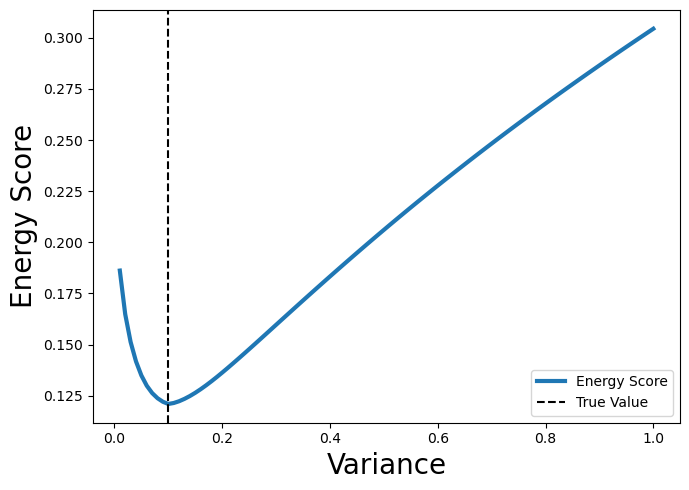

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
from tqdm import tqdm
import torch.nn as nn

def Energy_Score(energy_beta, observations_y, simulations_Y):
    m = len(simulations_Y)
    diff_Y_y = torch.pow(
        torch.norm(
            (observations_y.unsqueeze(1) -
             simulations_Y.unsqueeze(0)).float(),
            dim=2, keepdim=True).reshape(-1, 1),
        energy_beta)
    diff_Y_Y = 2 * torch.pow(
        nn.functional.pdist(simulations_Y),
        energy_beta)
    Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
    return Energy

def SR_eval(energy_beta, real_samples, fake_samples):
    out = 0
    for i in range(len(real_samples)):
        out += Energy_Score(energy_beta, real_samples[i].view(-1, 1), fake_samples[i].view(-1, 1))
    return out / (len(real_samples) + len(fake_samples)) 

def pairwise_distance(x1, x2):
    return ((x1.unsqueeze(1) - x2.unsqueeze(0)) ** 2).sum(-1)

def RBF(variance, length_scale):
    def rbf_kernel(x1, x2):
        dist = pairwise_distance(x1, x2)
        covariance_matrix = variance*torch.exp(-0.5 * dist / length_scale ** 2)
        try:
            L = torch.cholesky(covariance_matrix, upper=False)
        except RuntimeError:
            min_eig = torch.min(torch.linalg.eigvalsh(covariance_matrix))
            covariance_matrix += torch.eye(covariance_matrix.shape[0]) * (-min_eig + 1e-6)
        return covariance_matrix
    return rbf_kernel

locs = torch.meshgrid(torch.tensor([0,1,2,3,4]), torch.tensor([0,1,2,3,4]))
locs = torch.stack((locs[0].flatten(), locs[1].flatten())).t().float()

length_scale = 2
variance = 0.1
rbf_kernel = RBF(variance, length_scale)
true_cov = rbf_kernel(locs, locs)

torch.manual_seed(42)
mvn = MultivariateNormal(torch.zeros(25), covariance_matrix=true_cov.float())
obs_z = mvn.sample((100,))

SR_beta = 1.0
SR_E = []
mean = torch.zeros(25)
for i in tqdm(torch.linspace(0.01, 1, 100)):
    torch.manual_seed(42)
    cov_ = RBF(i, length_scale)(locs, locs)
    multi = MultivariateNormal(mean, covariance_matrix=cov_.float())
    sims = multi.sample((100,))
    SR_E.append(SR_eval(SR_beta, obs_z, sims))

plt.figure(figsize=(7, 5))
plt.plot(torch.linspace(0.01, 1, 100), SR_E , label='Energy Score', linewidth=3)

plt.axvline(x=0.1, color='black', linestyle='--', label='True Value')
plt.legend()

plt.xlabel('Variance', fontsize=20)
plt.ylabel('Energy Score', fontsize=20)

plt.tight_layout()
plt.show()


## Length Scale

100%|██████████| 100/100 [00:06<00:00, 16.61it/s]


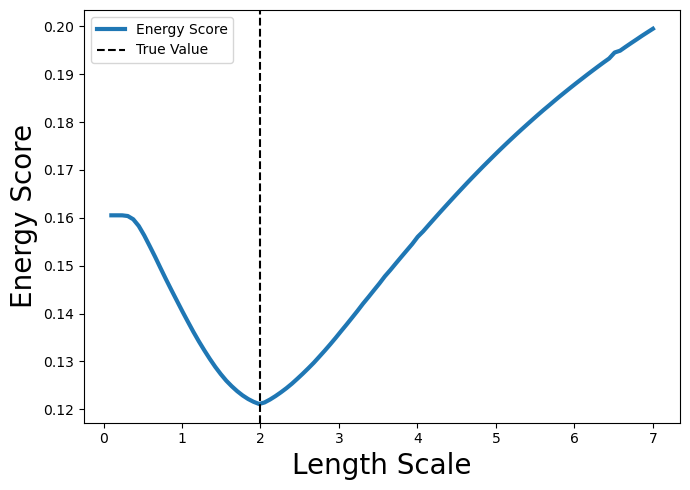

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
from tqdm import tqdm
import torch.nn as nn

def Energy_Score(energy_beta, observations_y, simulations_Y):
    m = len(simulations_Y)
    diff_Y_y = torch.pow(
        torch.norm(
            (observations_y.unsqueeze(1) -
             simulations_Y.unsqueeze(0)).float(),
            dim=2, keepdim=True).reshape(-1, 1),
        energy_beta)
    diff_Y_Y = 2 * torch.pow(
        nn.functional.pdist(simulations_Y),
        energy_beta)
    Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
    return Energy

def SR_eval(energy_beta, real_samples, fake_samples):
    out = 0
    for i in range(len(real_samples)):
        out += Energy_Score(energy_beta, real_samples[i].view(-1, 1), fake_samples[i].view(-1, 1))
    return out / (len(real_samples) + len(fake_samples)) 

def pairwise_distance(x1, x2):
    return ((x1.unsqueeze(1) - x2.unsqueeze(0)) ** 2).sum(-1)

def RBF(variance, length_scale):
    def rbf_kernel(x1, x2):
        dist = pairwise_distance(x1, x2)
        covariance_matrix = variance*torch.exp(-0.5 * dist / length_scale ** 2)
        try:
            L = torch.cholesky(covariance_matrix, upper=False)
        except RuntimeError:
            min_eig = torch.min(torch.linalg.eigvalsh(covariance_matrix))
            covariance_matrix += torch.eye(covariance_matrix.shape[0]) * (-min_eig + 1e-6)
        return covariance_matrix
    return rbf_kernel

locs = torch.meshgrid(torch.tensor([0,1,2,3,4]), torch.tensor([0,1,2,3,4]))
locs = torch.stack((locs[0].flatten(), locs[1].flatten())).t().float()

length_scale = 2
variance = 0.1
rbf_kernel = RBF(variance, length_scale)
true_cov = rbf_kernel(locs, locs)

torch.manual_seed(42)
mvn = MultivariateNormal(torch.zeros(25), covariance_matrix=true_cov.float())
obs_z = mvn.sample((100,))

SR_beta = 1.0
SR_E = []
mean = torch.zeros(25)
for i in tqdm(torch.linspace(0.1, 7, 100)):
    torch.manual_seed(42)
    cov_ = RBF(variance, i)(locs, locs)
    multi = MultivariateNormal(mean, covariance_matrix=cov_.float())
    sims = multi.sample((100,))
    SR_E.append(SR_eval(SR_beta, obs_z, sims))

plt.figure(figsize=(7, 5))
plt.plot(torch.linspace(0.1, 7, 100), SR_E , label='Energy Score', linewidth=3)

plt.axvline(x=2, color='black', linestyle='--', label='True Value')
plt.legend()

plt.xlabel('Length Scale', fontsize=20)
plt.ylabel('Energy Score', fontsize=20)

plt.tight_layout()
plt.show()


## Bivariate Contour Plot

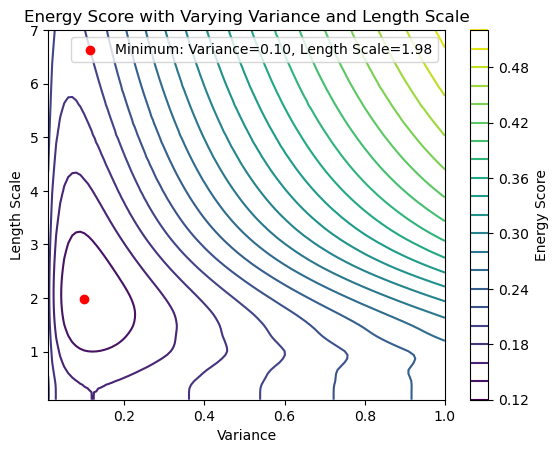

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
import torch.nn as nn

def Energy_Score(energy_beta, observations_y, simulations_Y):
    m = len(simulations_Y)
    diff_Y_y = torch.pow(
        torch.norm(
            (observations_y.unsqueeze(1) -
             simulations_Y.unsqueeze(0)).float(),
            dim=2, keepdim=True).reshape(-1, 1),
        energy_beta)
    diff_Y_Y = 2 * torch.pow(
        nn.functional.pdist(simulations_Y),
        energy_beta)
    Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
    return Energy

def SR_eval(energy_beta, real_samples, fake_samples):
    out = 0
    for i in range(len(real_samples)):
        out += Energy_Score(energy_beta, real_samples[i].view(-1, 1), fake_samples[i].view(-1, 1))
    return out / (len(real_samples) + len(fake_samples)) 

def pairwise_distance(x1, x2):
    return ((x1.unsqueeze(1) - x2.unsqueeze(0)) ** 2).sum(-1)

def RBF(variance, length_scale):
    def rbf_kernel(x1, x2):
        dist = pairwise_distance(x1, x2)
        covariance_matrix = variance * torch.exp(-0.5 * dist / length_scale ** 2)
        try:
            L = torch.cholesky(covariance_matrix, upper=False)
        except RuntimeError:
            min_eig = torch.min(torch.linalg.eigvalsh(covariance_matrix))
            covariance_matrix += torch.eye(covariance_matrix.shape[0]) * (-min_eig + 1e-6)
        return covariance_matrix
    return rbf_kernel

def generate_samples(n_samples, locs, covariance_matrix):
    mvn = MultivariateNormal(torch.zeros(locs.size(0)), covariance_matrix=covariance_matrix.float())
    return mvn.sample((n_samples,))

locs = torch.meshgrid(torch.tensor([0, 1, 2, 3, 4]), torch.tensor([0, 1, 2, 3, 4]))
locs = torch.stack((locs[0].flatten(), locs[1].flatten())).t().float()

true_length_scale = 2
true_variance = 0.1
rbf_kernel = RBF(true_variance, true_length_scale)
true_cov = rbf_kernel(locs, locs)

torch.manual_seed(42)
mvn = MultivariateNormal(torch.zeros(locs.size(0)), covariance_matrix=true_cov.float())
obs_z = mvn.sample((100,))

# Define the range of length scales and variances
length_scales = torch.linspace(0.1, 7, 100)
variances = torch.linspace(0.01, 1, 100)

SR_beta = 1.0
SR_Egp = torch.zeros((len(length_scales), len(variances)))

for i, length_scale in enumerate(length_scales):
    for j, variance in enumerate(variances):
        cov_ = RBF(variance, length_scale)(locs, locs)
        torch.manual_seed(42)
        multi = MultivariateNormal(torch.zeros(25), covariance_matrix=cov_.float())
        sims = multi.sample((100,))
        SR_Egp[i, j] = SR_eval(SR_beta, obs_z, sims)

# Contour plot
plt.contour(variances, length_scales, SR_Egp, levels=20)
plt.colorbar(label='Energy Score')
plt.title("Energy Score with Varying Variance and Length Scale")
plt.xlabel('Variance')
plt.ylabel('Length Scale')
# Highlight minimum value
min_value = SR_Egp.min()
min_indices = np.unravel_index(torch.argmin(SR_Egp).item(), SR_Egp.shape)
min_var, min_ls = variances[min_indices[1]].item(), length_scales[min_indices[0]].item()
plt.scatter(min_var, min_ls, color='red', label=f'Minimum: Variance={min_var:.2f}, Length Scale={min_ls:.2f}')
plt.legend()

plt.show()


# True Parameters (0.6, 5)

## Variance

100%|██████████| 100/100 [00:05<00:00, 18.17it/s]


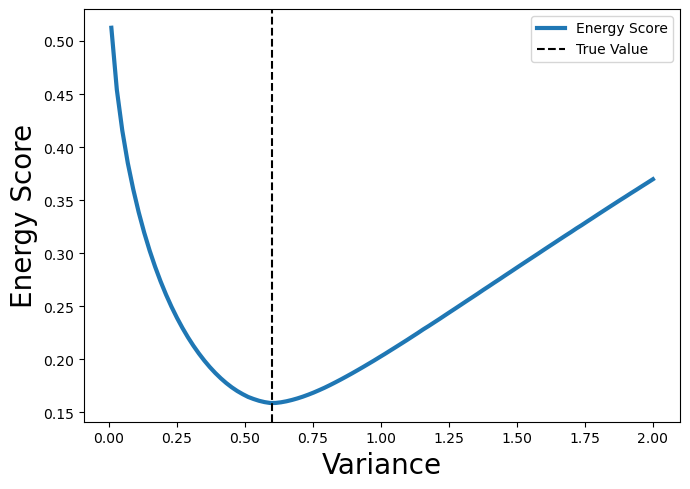

In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
from tqdm import tqdm
import torch.nn as nn

def Energy_Score(energy_beta, observations_y, simulations_Y):
    m = len(simulations_Y)
    diff_Y_y = torch.pow(
        torch.norm(
            (observations_y.unsqueeze(1) -
             simulations_Y.unsqueeze(0)).float(),
            dim=2, keepdim=True).reshape(-1, 1),
        energy_beta)
    diff_Y_Y = 2 * torch.pow(
        nn.functional.pdist(simulations_Y),
        energy_beta)
    Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
    return Energy

def SR_eval(energy_beta, real_samples, fake_samples):
    out = 0
    for i in range(len(real_samples)):
        out += Energy_Score(energy_beta, real_samples[i].view(-1, 1), fake_samples[i].view(-1, 1))
    return out / (len(real_samples) + len(fake_samples)) 

def pairwise_distance(x1, x2):
    return ((x1.unsqueeze(1) - x2.unsqueeze(0)) ** 2).sum(-1)

def RBF(variance, length_scale):
    def rbf_kernel(x1, x2):
        dist = pairwise_distance(x1, x2)
        covariance_matrix = variance*torch.exp(-0.5 * dist / length_scale ** 2)
        try:
            L = torch.cholesky(covariance_matrix, upper=False)
        except RuntimeError:
            min_eig = torch.min(torch.linalg.eigvalsh(covariance_matrix))
            covariance_matrix += torch.eye(covariance_matrix.shape[0]) * (-min_eig + 1e-6)
        return covariance_matrix
    return rbf_kernel

locs = torch.meshgrid(torch.tensor([0,1,2,3,4]), torch.tensor([0,1,2,3,4]))
locs = torch.stack((locs[0].flatten(), locs[1].flatten())).t().float()

length_scale = 5
variance = 0.6
rbf_kernel = RBF(variance, length_scale)
true_cov = rbf_kernel(locs, locs)

torch.manual_seed(42)
mvn = MultivariateNormal(torch.zeros(25), covariance_matrix=true_cov.float())
obs_z = mvn.sample((100,))

SR_beta = 1.0
SR_E = []
mean = torch.zeros(25)
for i in tqdm(torch.linspace(0.01, 2, 100)):
    torch.manual_seed(42)
    cov_ = RBF(i, length_scale)(locs, locs)
    multi = MultivariateNormal(mean, covariance_matrix=cov_.float())
    sims = multi.sample((100,))
    SR_E.append(SR_eval(SR_beta, obs_z, sims))

plt.figure(figsize=(7, 5))
plt.plot(torch.linspace(0.01, 2, 100), SR_E , label='Energy Score', linewidth=3)

plt.axvline(x=0.6, color='black', linestyle='--', label='True Value')
plt.legend()

plt.xlabel('Variance', fontsize=20)
plt.ylabel('Energy Score', fontsize=20)

plt.tight_layout()
plt.show()


## Length Scale

100%|██████████| 100/100 [00:06<00:00, 15.95it/s]


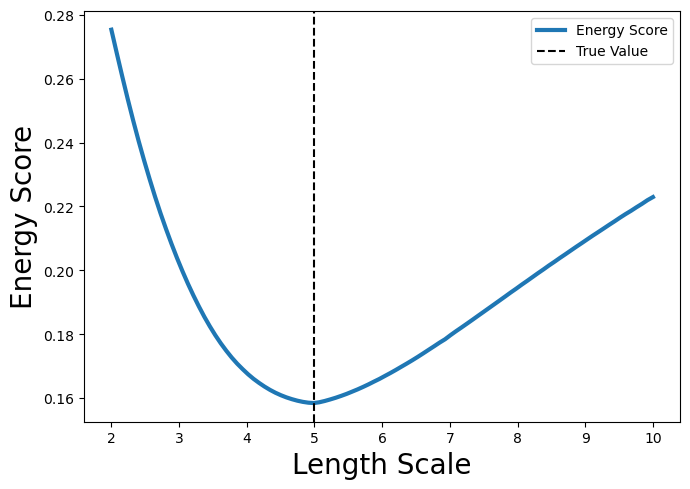

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
from tqdm import tqdm
import torch.nn as nn

def Energy_Score(energy_beta, observations_y, simulations_Y):
    m = len(simulations_Y)
    diff_Y_y = torch.pow(
        torch.norm(
            (observations_y.unsqueeze(1) -
             simulations_Y.unsqueeze(0)).float(),
            dim=2, keepdim=True).reshape(-1, 1),
        energy_beta)
    diff_Y_Y = 2 * torch.pow(
        nn.functional.pdist(simulations_Y),
        energy_beta)
    Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
    return Energy

def SR_eval(energy_beta, real_samples, fake_samples):
    out = 0
    for i in range(len(real_samples)):
        out += Energy_Score(energy_beta, real_samples[i].view(-1, 1), fake_samples[i].view(-1, 1))
    return out / (len(real_samples) + len(fake_samples)) 

def pairwise_distance(x1, x2):
    return ((x1.unsqueeze(1) - x2.unsqueeze(0)) ** 2).sum(-1)

def RBF(variance, length_scale):
    def rbf_kernel(x1, x2):
        dist = pairwise_distance(x1, x2)
        covariance_matrix = variance*torch.exp(-0.5 * dist / length_scale ** 2)
        try:
            L = torch.cholesky(covariance_matrix, upper=False)
        except RuntimeError:
            min_eig = torch.min(torch.linalg.eigvalsh(covariance_matrix))
            covariance_matrix += torch.eye(covariance_matrix.shape[0]) * (-min_eig + 1e-6)
        return covariance_matrix
    return rbf_kernel

locs = torch.meshgrid(torch.tensor([0,1,2,3,4]), torch.tensor([0,1,2,3,4]))
locs = torch.stack((locs[0].flatten(), locs[1].flatten())).t().float()

length_scale = 5
variance = 0.6
rbf_kernel = RBF(variance, length_scale)
true_cov = rbf_kernel(locs, locs)

torch.manual_seed(42)
mvn = MultivariateNormal(torch.zeros(25), covariance_matrix=true_cov.float())
obs_z = mvn.sample((100,))

SR_beta = 1.0
SR_E = []
mean = torch.zeros(25)
for i in tqdm(torch.linspace(2, 10, 100)):
    torch.manual_seed(42)
    cov_ = RBF(variance, i)(locs, locs)
    multi = MultivariateNormal(mean, covariance_matrix=cov_.float())
    sims = multi.sample((100,))
    SR_E.append(SR_eval(SR_beta, obs_z, sims))

plt.figure(figsize=(7, 5))
plt.plot(torch.linspace(2, 10, 100), SR_E , label='Energy Score', linewidth=3)

plt.axvline(x=5, color='black', linestyle='--', label='True Value')
plt.legend()

plt.xlabel('Length Scale', fontsize=20)
plt.ylabel('Energy Score', fontsize=20)

plt.tight_layout()
plt.show()


## Bivariate Contour Plot

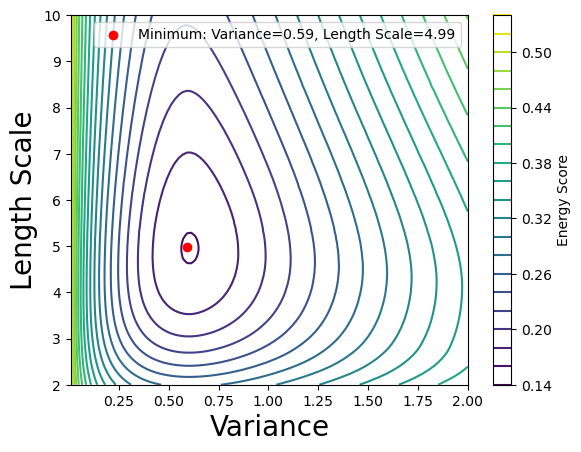

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
import torch.nn as nn

def Energy_Score(energy_beta, observations_y, simulations_Y):
    m = len(simulations_Y)
    diff_Y_y = torch.pow(
        torch.norm(
            (observations_y.unsqueeze(1) -
             simulations_Y.unsqueeze(0)).float(),
            dim=2, keepdim=True).reshape(-1, 1),
        energy_beta)
    diff_Y_Y = 2 * torch.pow(
        nn.functional.pdist(simulations_Y),
        energy_beta)
    Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
    return Energy

def SR_eval(energy_beta, real_samples, fake_samples):
    out = 0
    for i in range(len(real_samples)):
        out += Energy_Score(energy_beta, real_samples[i].view(-1, 1), fake_samples[i].view(-1, 1))
    return out / (len(real_samples) + len(fake_samples)) 

def pairwise_distance(x1, x2):
    return ((x1.unsqueeze(1) - x2.unsqueeze(0)) ** 2).sum(-1)

def RBF(variance, length_scale):
    def rbf_kernel(x1, x2):
        dist = pairwise_distance(x1, x2)
        covariance_matrix = variance * torch.exp(-0.5 * dist / length_scale ** 2)
        try:
            L = torch.cholesky(covariance_matrix, upper=False)
        except RuntimeError:
            min_eig = torch.min(torch.linalg.eigvalsh(covariance_matrix))
            covariance_matrix += torch.eye(covariance_matrix.shape[0]) * (-min_eig + 1e-6)
        return covariance_matrix
    return rbf_kernel

def generate_samples(n_samples, locs, covariance_matrix):
    mvn = MultivariateNormal(torch.zeros(locs.size(0)), covariance_matrix=covariance_matrix.float())
    return mvn.sample((n_samples,))

locs = torch.meshgrid(torch.tensor([0, 1, 2, 3, 4]), torch.tensor([0, 1, 2, 3, 4]))
locs = torch.stack((locs[0].flatten(), locs[1].flatten())).t().float()

true_length_scale = 5
true_variance = 0.6
rbf_kernel = RBF(true_variance, true_length_scale)
true_cov = rbf_kernel(locs, locs)

torch.manual_seed(42)
mvn = MultivariateNormal(torch.zeros(locs.size(0)), covariance_matrix=true_cov.float())
obs_z = mvn.sample((100,))

# Define the range of length scales and variances
length_scales = torch.linspace(2, 10, 100)
variances = torch.linspace(0.01, 2, 100)

SR_beta = 1.0
SR_Egp = torch.zeros((len(length_scales), len(variances)))

for i, length_scale in enumerate(length_scales):
    for j, variance in enumerate(variances):
        cov_ = RBF(variance, length_scale)(locs, locs)
        torch.manual_seed(42)
        multi = MultivariateNormal(torch.zeros(25), covariance_matrix=cov_.float())
        sims = multi.sample((100,))
        SR_Egp[i, j] = SR_eval(SR_beta, obs_z, sims)

# Contour plot
plt.contour(variances, length_scales, SR_Egp, levels=20)
plt.colorbar(label='Energy Score')
plt.title("Energy Score with Varying Variance and Length Scale")
plt.xlabel('Variance')
plt.ylabel('Length Scale')

# Contour plot
plt.title("")
plt.xlabel('Variance', fontsize=20)
plt.ylabel('Length Scale', fontsize=20)
# Highlight minimum value
min_value = SR_Egp.min()
min_indices = np.unravel_index(torch.argmin(SR_Egp).item(), SR_Egp.shape)
min_var, min_ls = variances[min_indices[1]].item(), length_scales[min_indices[0]].item()
plt.scatter(min_var, min_ls, color='red', label=f'Minimum: Variance={min_var:.2f}, Length Scale={min_ls:.2f}')
plt.legend()

plt.show()
